In [1]:
from PIL import Image
from matplotlib import cm
import numpy as np

import metaworld
from metaworld.policies.sawyer_window_open_v2_policy import SawyerWindowOpenV2Policy
from metaworld.policies.sawyer_soccer_v2_policy import SawyerSoccerV2Policy
from metaworld.policies.sawyer_hammer_v2_policy import SawyerHammerV2Policy
from metaworld.policies.sawyer_drawer_open_v2_policy import SawyerDrawerOpenV2Policy
import random

import time

from config_yaz import *

import sys
import argparse
import cv2
import math

from save_config import *

from scipy.spatial.transform import Rotation as R

from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
def one_hot_affordance(obs: np.ndarray, color: np.ndarray = np.array([156, 104, 125])):
    indices = np.where(np.all(obs == color, axis=-1))
    affordance = np.zeros((obs.shape[0], obs.shape[1], 1))
    affordance[indices] = 1
    return affordance

In [41]:
task_name = "drawer-open-v2"
render_mode = "rgb_array"

ml1 = metaworld.ML1(task_name)  # Construct the benchmark, sampling tasks

env = ml1.train_classes[task_name](
    render_mode=render_mode
)  # Create an environment with task `window_open`

task = random.choice(ml1.train_tasks)
env.set_task(task)  # Set task

(480, 480, 3) (480, 480, 3) (480, 480)


'\nfig = plt.figure(figsize=(1, 3))\nfig.add_subplot(480, 480, 1)\nplt.imshow(rgb)\nfig.add_subplot(480, 480, 2)\nplt.imshow(seg)\nfig.add_subplot(480, 480, 3)\nplt.imshow(depth)\n\nplt.show()\n'

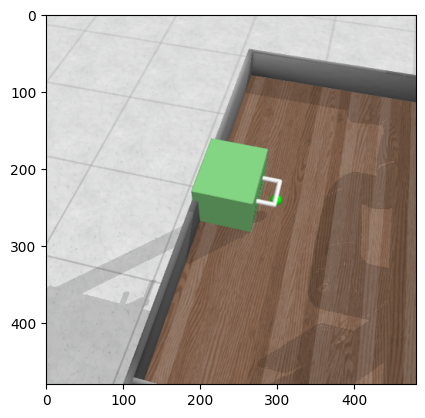

In [54]:
env.camera_name = f"CUSTOM8" # 2, 7, 8 best

rgb, seg, depth = env.render()

print(rgb.shape, seg.shape, depth.shape)
#rgb = Image.fromarray(rgb)
plt.imshow(rgb)

seg = one_hot_affordance(seg)
#seg = Image.fromarray(seg)

#depth = Image.fromarray(depth)

"""
fig = plt.figure(figsize=(1, 3))
fig.add_subplot(480, 480, 1)
plt.imshow(rgb)
fig.add_subplot(480, 480, 2)
plt.imshow(seg)
fig.add_subplot(480, 480, 3)
plt.imshow(depth)

plt.show()
"""